[Tensor4all TCI Github Page (preview)](https://github.com/tensor4all/TensorCrossInterpolation.jl)
<br>
[Tensor4all TCI Github Page (manual)](https://tensor4all.org/TensorCrossInterpolation.jl/dev/)

In [ ]:
# pkg import test
import TensorCrossInterpolation as TCI

In [18]:
# Example Code in manual
f(v) = 1/(1 + v' * v)
localdims = fill(10, 5)    # There are 5 tensor indices, each with values 1...10
tolerance = 1e-8
tci, ranks, errors = TCI.crossinterpolate2(Float64, f, localdims; tolerance=tolerance)
println(tci)
println(ranks)
println(errors)

TensorCrossInterpolation.TensorCI2{Float64} with rank 11
[11, 11, 11]
[2.0169632000723285e-9, 1.9111313748018586e-9, 1.9111313748018586e-9]


Implement TCI for Given Function :
$$
\begin{split}
f(j;kl) &= \cos{(2 \pi \frac{jk}{N})} \cdot \sin{(2 \pi \frac{jl}{N})} \cdot e^{-\frac{j}{N}} \\ &+ \sin{(2 \pi \frac{jk}{N})} \cdot \cos(2 \pi \frac{jl}{N}) \cdot e^{-\frac{j^2}{N^2}}
\end{split}
$$


<font size = 5> **Task 1** </font> <br>
Show that for given $j$, $\tilde{f}_{j}(kl)$ can be well approximated by TCI.

In [ ]:
# pkg import
import TensorCrossInterpolation as TCI
using Plots

#Exact Case
j::Int = 1
N::Int = 100

function f(v)
    k = v[1]
    l = v[2]
    term1 = cos(2*π*(j*k/N)) * sin(2*π*(j*l/N))* exp(-j/N)
    term2 = sin(2*π*(j*k/N)) * cos(2*π*(j*l/N))* exp(-j^2/N^2)
    return term1 + term2
end

originalMatrix = [f((i,j)) for i in 1:N, j in 1:N]
vis = heatmap(originalMatrix, title="Original Matrix", aspect_ratio=:equal, color=:viridis)

localdims = fill(N, 2) # N lattices for 2 variable
tolerance = 1e-8 #target error
tci, ranks, errors = TCI.crossinterpolate2(Float64, f, localdims; tolerance=tolerance)

println(ranks)
println(errors)
println(tci) #maybe I can access using its property
println(dump(tci))

plot(vis,size=(800, 800))

**Why does the matrix has rank 2?** <br>
<img src="Image/Rank2.jpg" alt="rank2" width=800>

<font size = 5> **Task 2** </font> <br>
For given $l$, $\tilde{g}_{l}(j,k)$ is not.

TensorCrossInterpolation.TensorCI2{Float64} with rank 6
[6, 6, 6]
[5.717648576819554e-15, 5.717648576819554e-15, 5.717648576819554e-15]


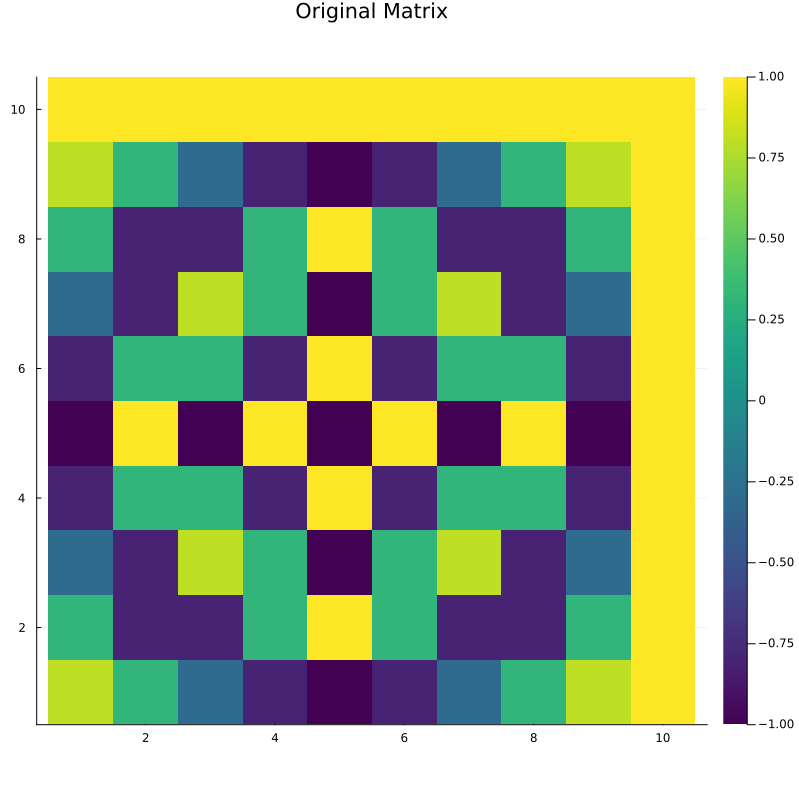

In [1]:
# pkg import
import TensorCrossInterpolation as TCI
using Plots

#Exact Case
l::Int = 1
N::Int = 10

function f(v)
    j = v[1]
    k = v[2]

    #term1 = cos(2*π*(j*k/N)) * sin(2*π*(j*l/N))* exp(-j/N)
    #term2 = cos(2*π*(j*k/N)) * sin(2*π*(j*l/N))* exp(-j^2/N^2)
    #return term1 + term2
    return cos(2*π*(j*k/N))
end

originalMatrix = [f((i,j)) for i in 1:N, j in 1:N]
vis = heatmap(originalMatrix, title="Original Matrix", aspect_ratio=:equal, color=:viridis)

localdims = fill(N, 2) # N lattices for 2 variable
tolerance = 1e-8 #target error
tci, ranks, errors = TCI.crossinterpolate2(Float64, f, localdims; tolerance=tolerance)
println(tci)
println(ranks)
println(errors)

plot(vis,size=(800, 800))

**Why the matrix has half-rank of original matirx?** <br>
<img src="Image/half_rank.jpg" alt="rank2" width="400">

<font size = 5> **For further step...** </font> <br>
Search the property of variable 'TCI' in **TensorCrossInterpolation.jl** with 'dump' function

<font size = 5> **Task 3** </font> <br>
Can we perform MC-TCI combined integral?